In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!pip install geopandas
!pip install pygeos
!pip install rtree

     |████████████████████████████████| 994 kB 28.5 MB/s 
     |████████████████████████████████| 6.3 MB 38.1 MB/s 
     |████████████████████████████████| 15.4 MB 84 kB/s 
     |████████████████████████████████| 1.8 MB 35.5 MB/s 
     |████████████████████████████████| 994 kB 22.3 MB/s 


In [3]:
# Import Library
import pandas as pd
import numpy as np
import datetime as dt
import math
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
from pandas.tseries.offsets import MonthBegin
import seaborn as sns
import statsmodels.api as sm
from shapely.geometry import Point, LineString, Polygon
import fiona

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
elements = pd.read_csv("./gdrive/MyDrive/COMP0158/London_Data_v6.csv")

In [5]:
def new_business_in_range(history, date1, date2):
    """ Qurey the data during specific period """
    new_busi = (history.query("(TS <= @date2 & TS >= @date1 & Version == 1) | (TS <= @date2 & TS >= @date1 & closure_tag != 'False')").reset_index(drop=True))
    return new_busi

def new_close_in_range(history, date1, date2):
    """ Qurey the data during specific period """
    new_close = (history.query("TS <= @date2 & TS >= @date1 & closure_tag != 'False'").reset_index(drop=True))
    return new_close

def updates_in_range(history, date1, date2):
    """ Qurey the data during specific period """
    update_busi = (history.query("TS <= @date2 & TS >= @date1 & Version != 1 & closure_tag == 'False'").reset_index(drop=True))
    return update_busi

def poi_in_range(history, date):
    """ Qurey the data before specific date/time """
    datedelems = (history.query("TS <= @date")
                  .groupby(['type','id'])['Version']
                  .max()
                  .reset_index())
    return pd.merge(datedelems, history, on=['type','id','Version'])

In [6]:
elements["YM"] = pd.to_datetime(elements["TS"]).apply(lambda x:x.strftime("%Y-%m"))

In [7]:
pre_new, post_new = new_business_in_range(elements,"2019-04-01","2020-03-31"), new_business_in_range(elements,"2020-04-01","2021-03-31")
pre_closure, post_closure = new_close_in_range(elements,"2019-04-01","2020-03-31"), new_close_in_range(elements,"2020-04-01","2021-03-31")
pre_update, post_update = updates_in_range(elements,"2019-04-01","2020-03-31"), updates_in_range(elements,"2020-04-01","2021-03-31")
#pre_poi, post_poi = gpd.GeoDataFrame(poi_in_range(elements, "2020-03-31")), gpd.GeoDataFrame(poi_in_range(elements, "2021-03-31"))

In [8]:
pre_new.head()

,type,id,Version,TS,Lat,Lon,amenity,name,amend_tag,amenity_group,closure_tag,previous_name,pre_amenity_group,YM
0,node,7346697235,1,2020-03-30 15:05:31+00:00,51.500388,-0.074737,bicycle_parking,NaN,NaN,Transportation,False,False,Other,2020-03
1,node,7344876560,1,2020-03-30 01:15:38+00:00,51.599306,-0.330767,post_box,NaN,NaN,Public_Service,False,False,Other,2020-03
2,node,7344876561,1,2020-03-30 01:15:38+00:00,51.601140,-0.333951,post_box,NaN,NaN,Public_Service,False,False,Other,2020-03
3,node,7344876562,1,2020-03-30 01:15:38+00:00,51.595428,-0.340332,post_box,NaN,NaN,Public_Service,False,False,Other,2020-03
4,node,7343498624,1,2020-03-29 16:26:36+00:00,51.589759,-0.332497,clinic,Harrow Talking Therapies,NaN,Healthcare,False,False,Other,2020-03


In [ ]:
# Regression Line Funtion for Plotting
x = np.arange(pre_update.groupby("YM").size().index.size)
fit = np.polyfit(x, pre_update.groupby("YM").size(), deg=1)
fit_function = np.poly1d(fit)

# Bar Plot

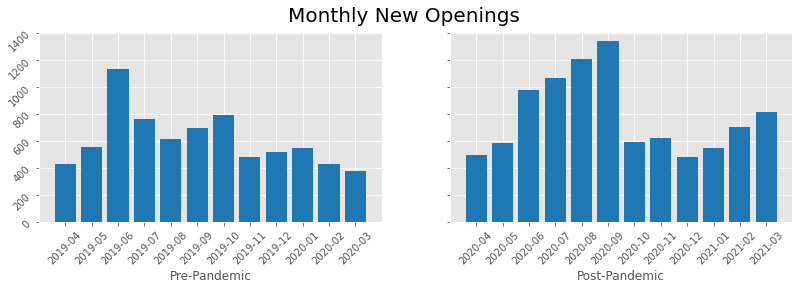

In [9]:
plt.style.use('ggplot')
f, ax = plt.subplots(1, 2, figsize=(13.5, 3.5), sharey='row')
ax[0].tick_params(labelrotation=45)

#ax[0].plot(pre_new.pivot_table(index='YM', columns='type', 
#                        aggfunc='size'),marker='o', ls=':',color="tab:purple")
ax[0].bar(pre_new.groupby("YM").size().index,pre_new.groupby("YM").size(),color="tab:blue")
#x = np.arange(pre_new.groupby("YM").size().index.size)
#fit = np.polyfit(x, pre_new.groupby("YM").size(), deg=1)
#fit_function = np.poly1d(fit)
#ax[0].plot(pre_new.groupby("YM").size().index, fit_function(x),color="tab:orange",lw=3,ls="--")
plt.setp(ax[0], xlabel='Pre-Pandemic')

ax[1].tick_params(labelrotation=45)

#ax[1].plot(post_new.pivot_table(index='YM', columns='type', 
#                        aggfunc='size'),marker='o', ls=':',color="tab:purple")
ax[1].bar(post_new.groupby("YM").size().index,post_new.groupby("YM").size(),color="tab:blue")
#x = np.arange(post_new.groupby("YM").size().index.size)
#fit = np.polyfit(x, post_new.groupby("YM").size(), deg=1)
#fit_function = np.poly1d(fit)
#ax[1].plot(post_new.groupby("YM").size().index, fit_function(x),color="tab:orange",lw=3,ls="--")
plt.setp(ax[1], xlabel='Post-Pandemic')

plt.suptitle("Monthly New Openings",fontsize=20)

plt.savefig("Monthly_New_London.png",bbox_inches = 'tight')

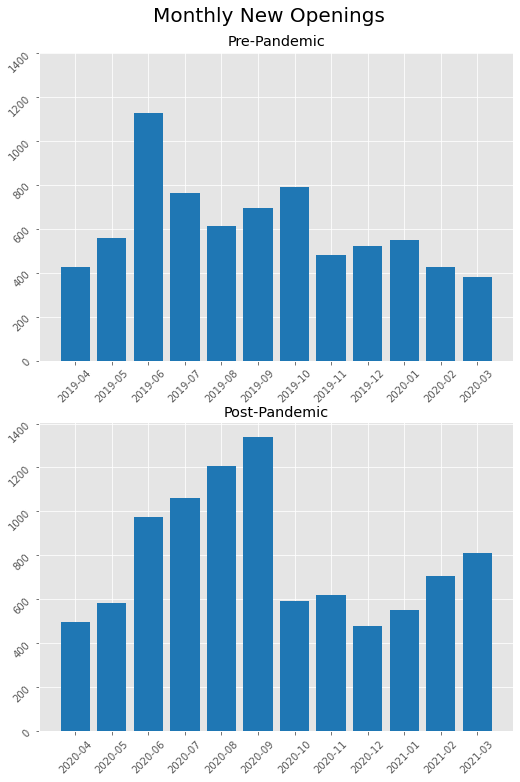

In [ ]:
plt.style.use('ggplot')
f, ax = plt.subplots(2, 1, figsize=(8.5, 12.5), sharey='col')
ax[0].tick_params(labelrotation=45)


ax[0].bar(pre_new.groupby("YM").size().index,pre_new.groupby("YM").size(),color="tab:blue")
plt.setp(ax[0], title='Pre-Pandemic')

ax[1].tick_params(labelrotation=45)


ax[1].bar(post_new.groupby("YM").size().index,post_new.groupby("YM").size(),color="tab:blue")
plt.setp(ax[1], title='Post-Pandemic')

n_rows = 2
y_title_pos = ax[0].get_position().get_points()[1][1]+(1/n_rows)*0.1
plt.suptitle("Monthly New Openings",fontsize=20,y=y_title_pos)

plt.savefig("Monthly_New_London.png",bbox_inches = 'tight')

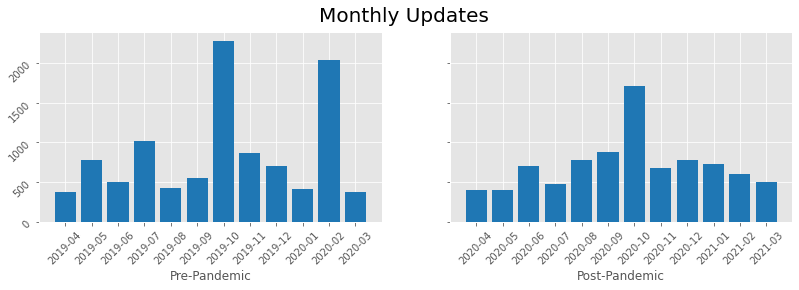

In [ ]:
plt.style.use('ggplot')
f, ax = plt.subplots(1, 2, figsize=(13.5, 3.5), sharey='row')
ax[0].tick_params(labelrotation=45)

#ax[0].plot(pre_update.pivot_table(index='YM', columns='type', 
#                        aggfunc='size'),marker='o', ls=':',color="tab:purple")
ax[0].bar(pre_update.groupby("YM").size().index,pre_update.groupby("YM").size(),color="tab:blue")
#x = np.arange(pre_update.groupby("YM").size().index.size)
#fit = np.polyfit(x, pre_update.groupby("YM").size(), deg=1)
#fit_function = np.poly1d(fit)
#ax[0].plot(pre_update.groupby("YM").size().index, fit_function(x),color="tab:orange",lw=3)
plt.setp(ax[0], xlabel='Pre-Pandemic')

ax[1].tick_params(labelrotation=45)

#ax[1].plot(post_update.pivot_table(index='YM', columns='type', 
#                        aggfunc='size'),marker='o', ls=':',color="tab:orange")
ax[1].bar(post_update.groupby("YM").size().index,post_update.groupby("YM").size(),color="tab:blue")
#x = np.arange(post_update.groupby("YM").size().index.size)
#fit = np.polyfit(x, post_update.groupby("YM").size(), deg=1)
#fit_function = np.poly1d(fit)
#ax[1].plot(post_update.groupby("YM").size().index, fit_function(x),color="tab:orange",lw=3)
plt.setp(ax[1], xlabel='Post-Pandemic')

plt.suptitle("Monthly Updates",fontsize=20)

plt.savefig("Monthly_Updates_London.png",bbox_inches = 'tight')

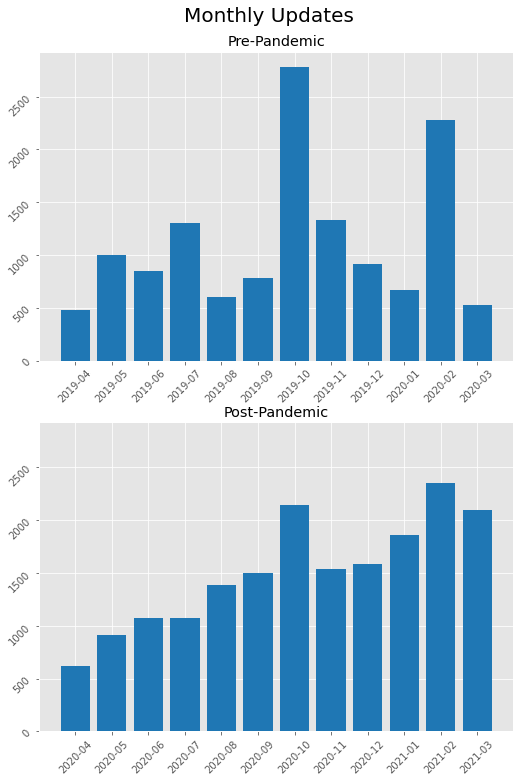

In [ ]:
plt.style.use('ggplot')
f, ax = plt.subplots(2, 1, figsize=(8.5, 12.5), sharey='col')
ax[0].tick_params(labelrotation=45)


ax[0].bar(pre_update.groupby("YM").size().index,pre_update.groupby("YM").size(),color="tab:blue")
plt.setp(ax[0], title='Pre-Pandemic')

ax[1].tick_params(labelrotation=45)


ax[1].bar(post_update.groupby("YM").size().index,post_update.groupby("YM").size(),color="tab:blue")
plt.setp(ax[1], title='Post-Pandemic')

n_rows = 2
y_title_pos = ax[0].get_position().get_points()[1][1]+(1/n_rows)*0.1
plt.suptitle("Monthly Updates",fontsize=20,y=y_title_pos)

plt.savefig("Monthly_Updates_London.png",bbox_inches = 'tight')

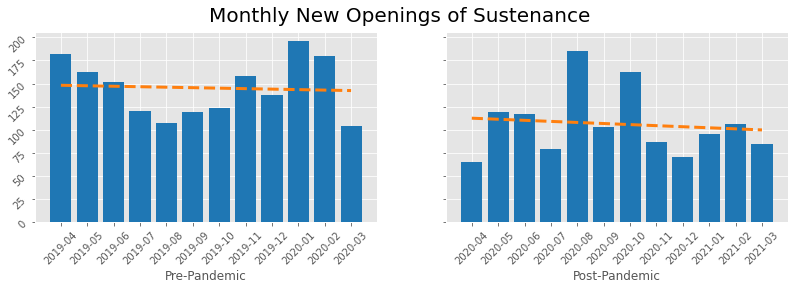

In [ ]:
# Monthly trend in sustenances businesses pre/post pandemic
grp = "Sustenance"

plt.style.use('ggplot')
f, ax = plt.subplots(1, 2, figsize=(13.5, 3.5), sharey='row')
ax[0].tick_params(labelrotation=45)

#ax[0].plot(pre_new.pivot_table(index='YM', columns='type', 
#                        aggfunc='size'),marker='o', ls=':',color="tab:purple")
ax[0].bar(pre_new[pre_new["amenity_group"]==grp].groupby("YM").size().index,pre_new[pre_new["amenity_group"]==grp].groupby("YM").size(),color="tab:blue")
x = np.arange(pre_new[pre_new["amenity_group"]==grp].groupby("YM").size().index.size)
fit = np.polyfit(x, pre_new[pre_new["amenity_group"]==grp].groupby("YM").size(), deg=1)
fit_function = np.poly1d(fit)
ax[0].plot(pre_new[pre_new["amenity_group"]==grp].groupby("YM").size().index, fit_function(x),color="tab:orange",lw=3,ls="--")
plt.setp(ax[0], xlabel='Pre-Pandemic')

ax[1].tick_params(labelrotation=45)

#ax[1].plot(post_new.pivot_table(index='YM', columns='type', 
#                        aggfunc='size'),marker='o', ls=':',color="tab:purple")
ax[1].bar(post_new[post_new["amenity_group"]==grp].groupby("YM").size().index,post_new[post_new["amenity_group"]==grp].groupby("YM").size(),color="tab:blue")
x = np.arange(post_new[post_new["amenity_group"]==grp].groupby("YM").size().index.size)
fit = np.polyfit(x, post_new[post_new["amenity_group"]==grp].groupby("YM").size(), deg=1)
fit_function = np.poly1d(fit)
ax[1].plot(post_new[post_new["amenity_group"]==grp].groupby("YM").size().index, fit_function(x),color="tab:orange",lw=3,ls="--")
plt.setp(ax[1], xlabel='Post-Pandemic')

plt.suptitle("Monthly New Openings of "+grp,fontsize=20)

plt.savefig(grp+"_London.png",bbox_inches = 'tight')

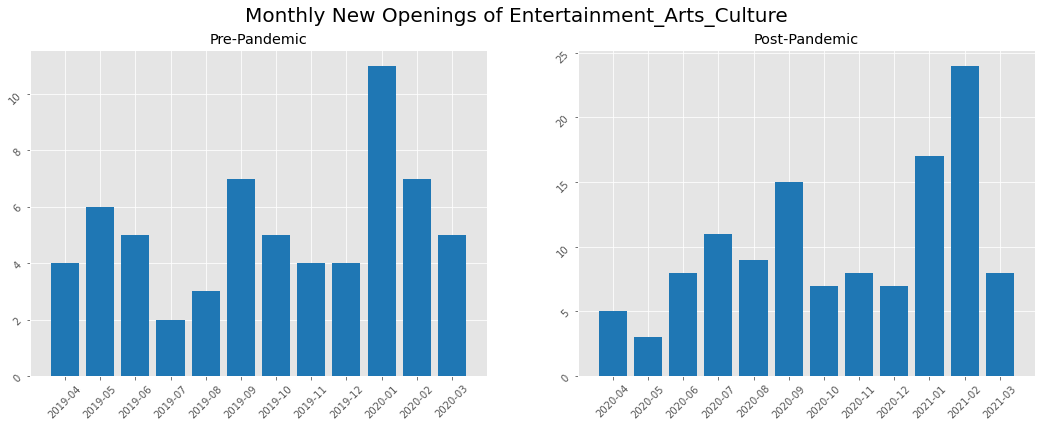

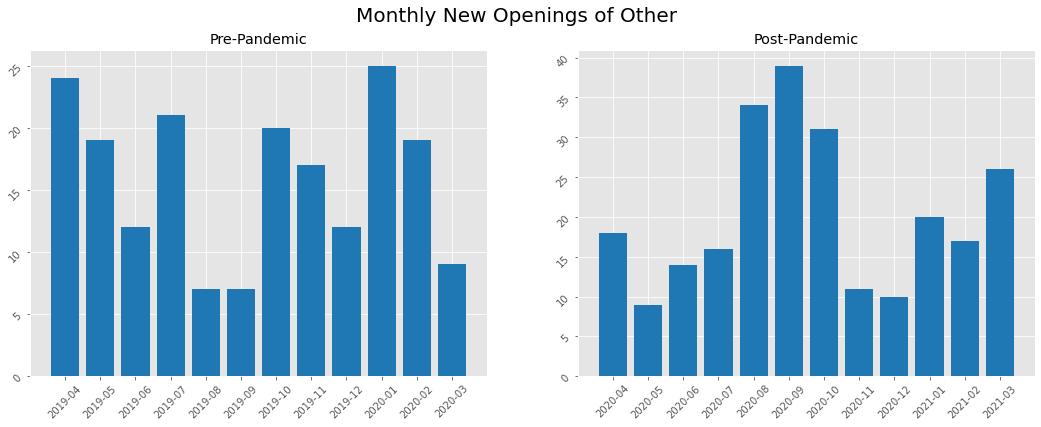

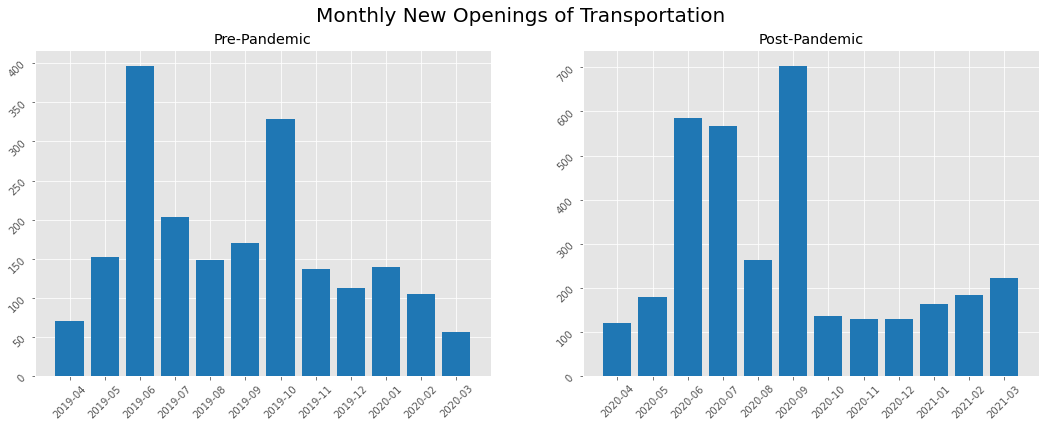

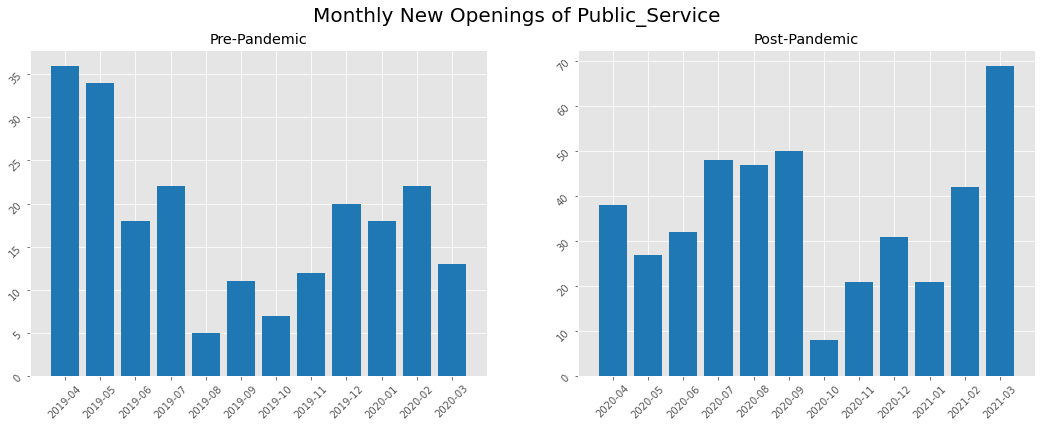

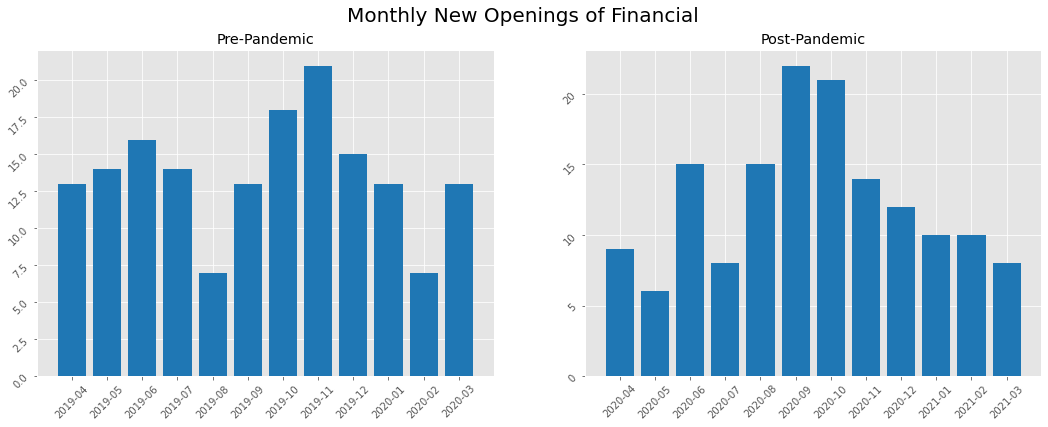

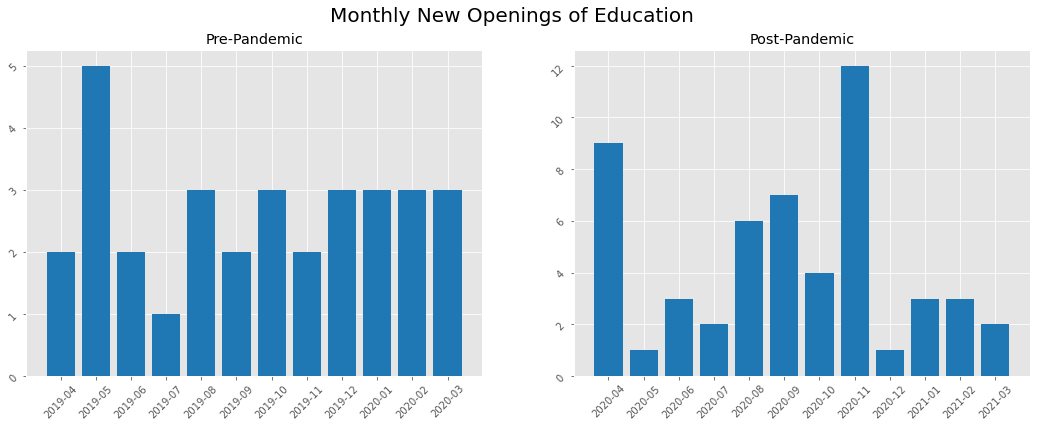

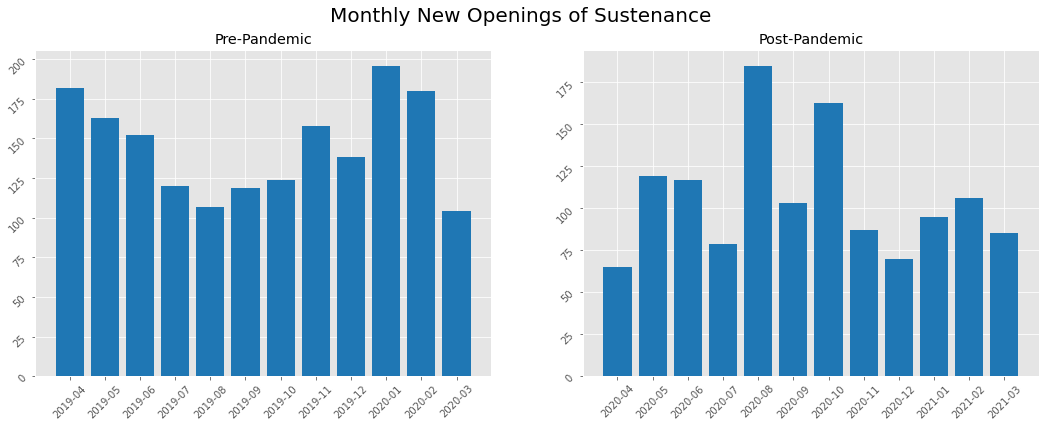

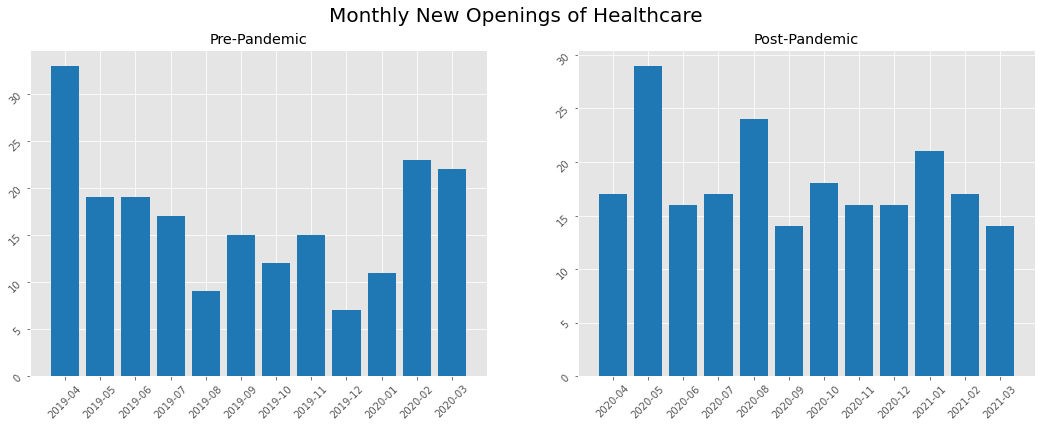

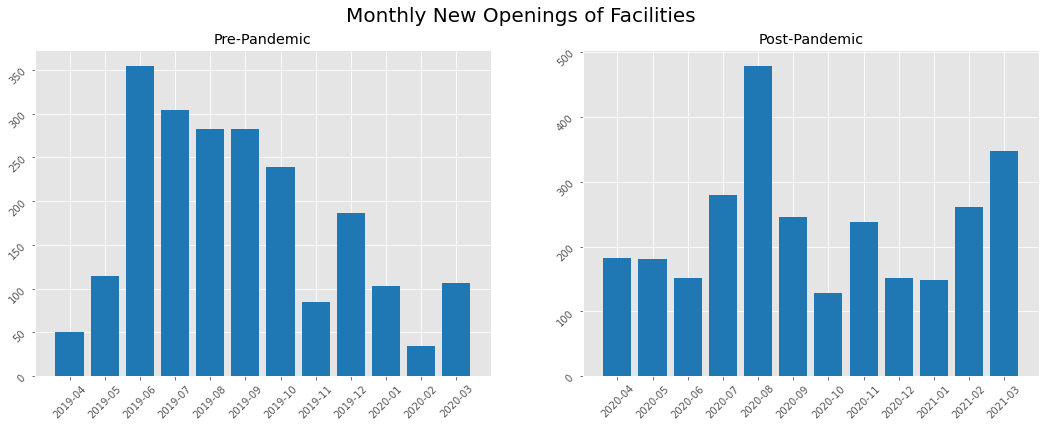

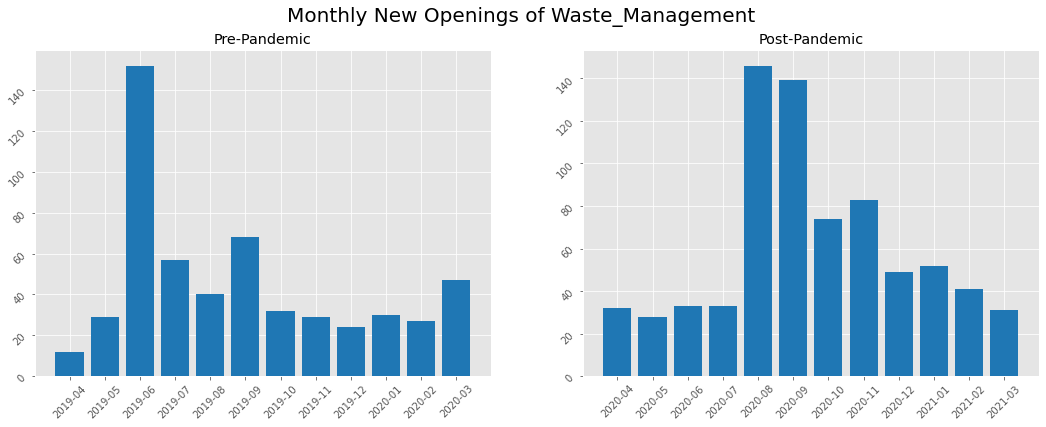

In [17]:
# Monthly trend in all type of businesses new openings pre/post pandemic
for grp in set(pre_new["amenity_group"]):

    plt.style.use('ggplot')
    #f, ax = plt.subplots(2, 1, figsize=(8.5, 12.5), sharey='col')
    f, ax = plt.subplots(1, 2, figsize=(18, 6), sharey='col')
    ax[0].tick_params(labelrotation=45)


    ax[0].bar(pre_new[pre_new["amenity_group"]==grp].groupby("YM").size().index,pre_new[pre_new["amenity_group"]==grp].groupby("YM").size(),color="tab:blue")
    plt.setp(ax[0], title='Pre-Pandemic')

    ax[1].tick_params(labelrotation=45)


    ax[1].bar(post_new[post_new["amenity_group"]==grp].groupby("YM").size().index,post_new[post_new["amenity_group"]==grp].groupby("YM").size(),color="tab:blue")
    plt.setp(ax[1], title='Post-Pandemic')

    n_rows = 1
    y_title_pos = ax[0].get_position().get_points()[1][1]+(1/n_rows)*0.1
    plt.suptitle("Monthly New Openings of "+grp,fontsize=20,y=y_title_pos)

    plt.savefig(grp+"_New_London.png",bbox_inches = 'tight')

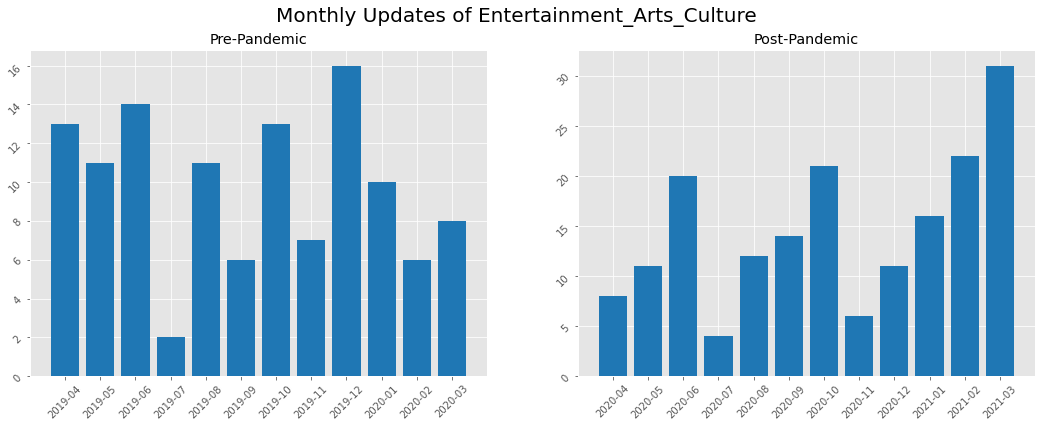

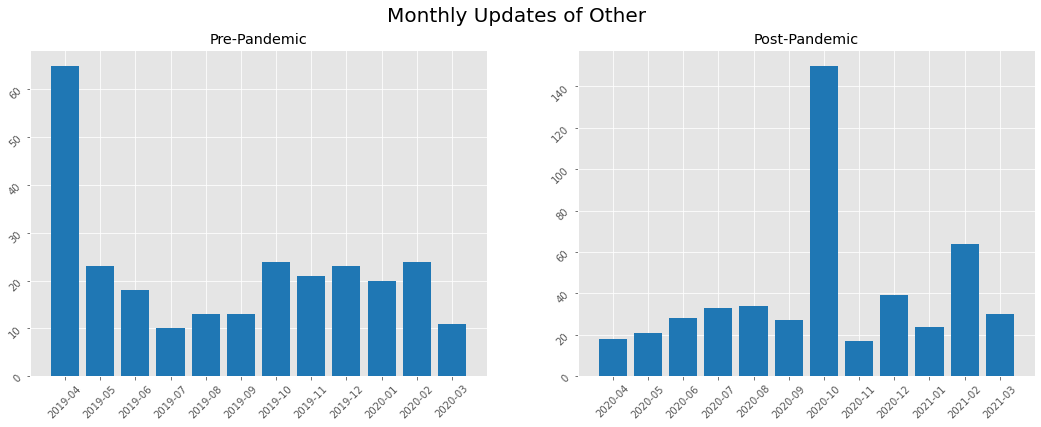

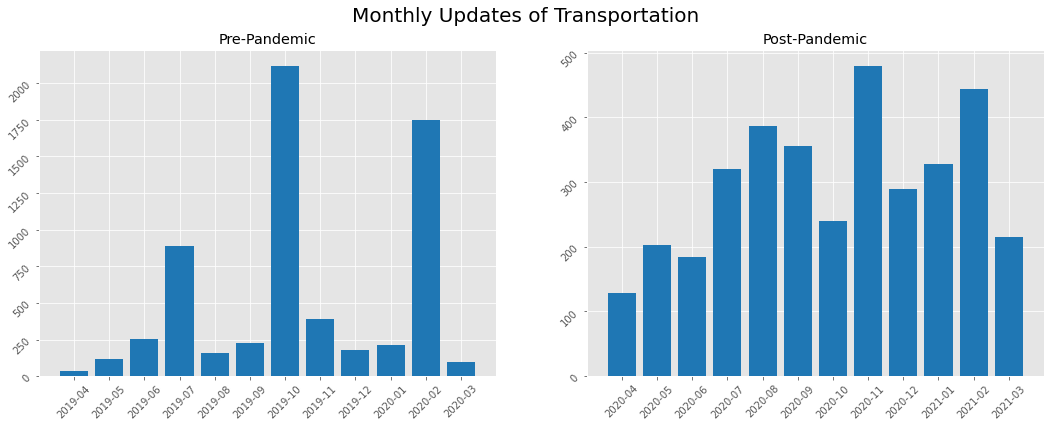

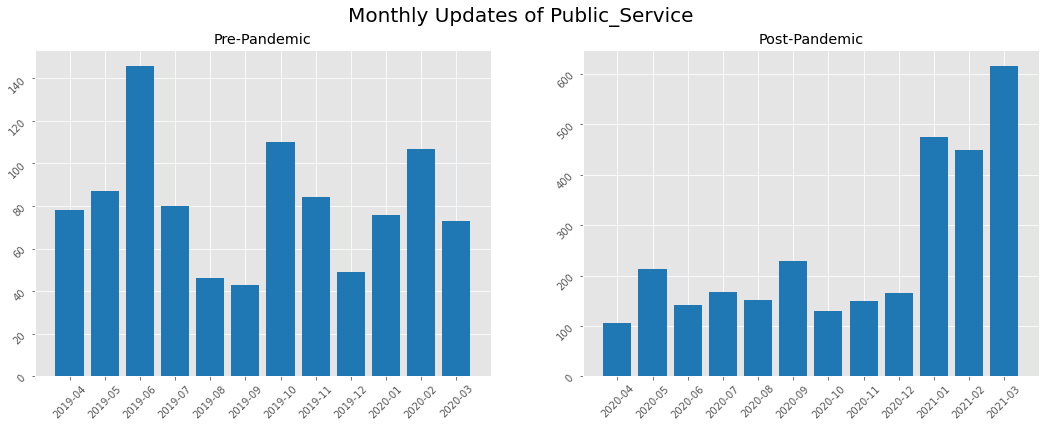

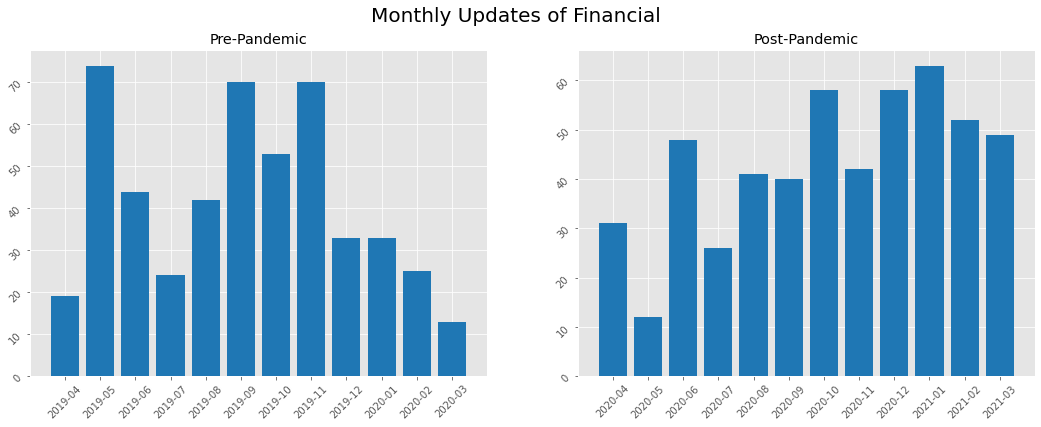

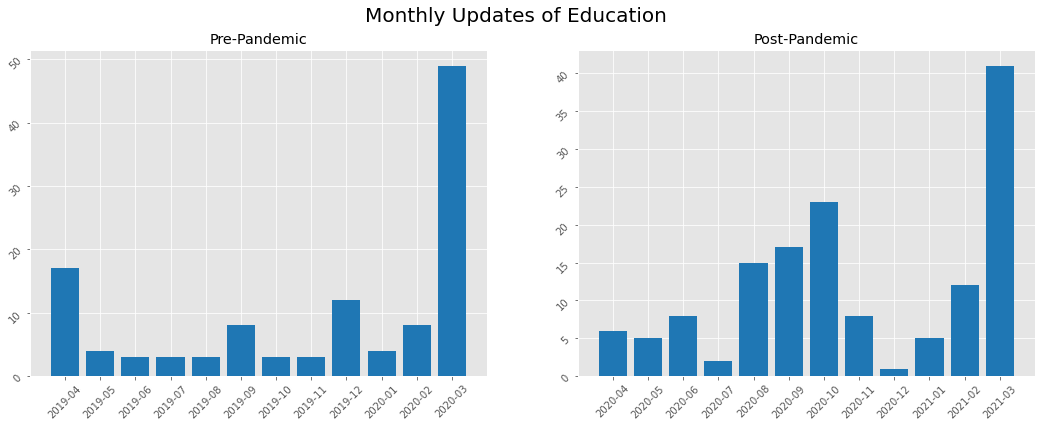

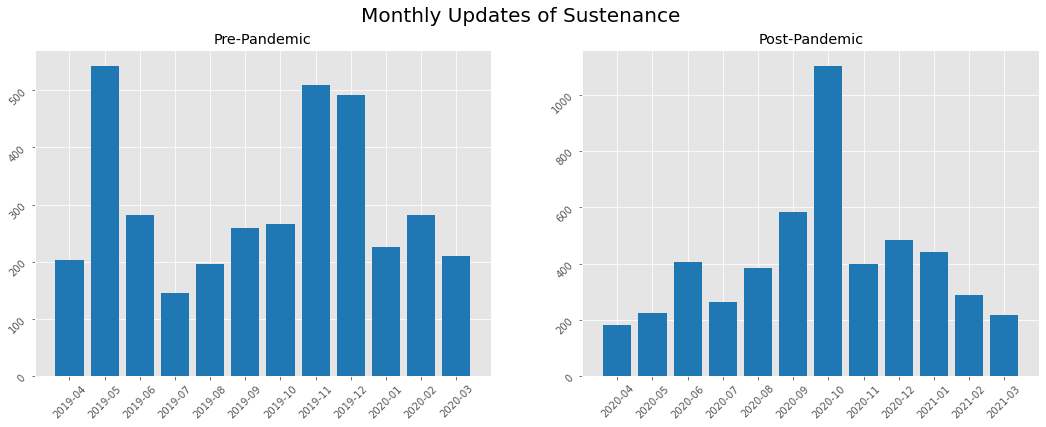

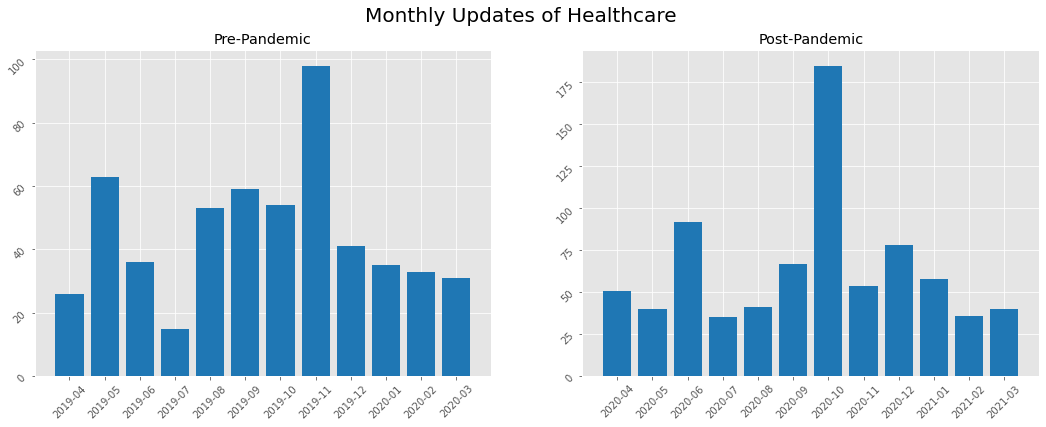

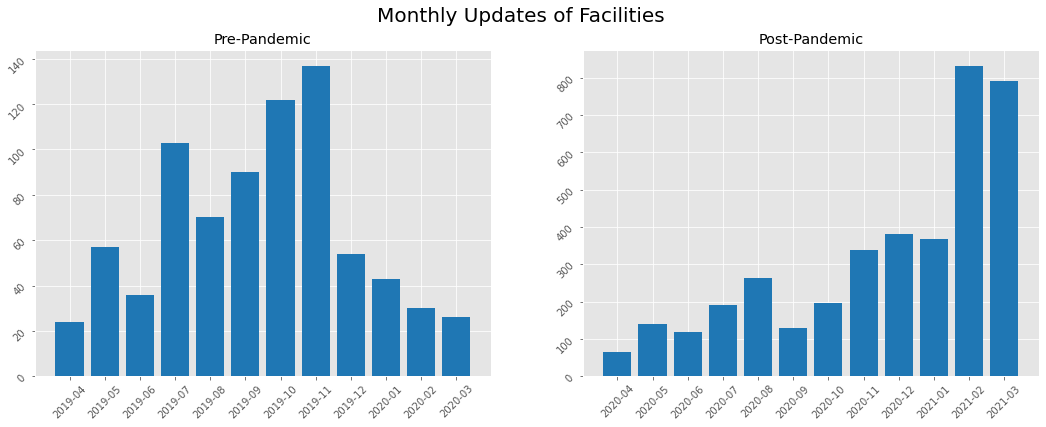

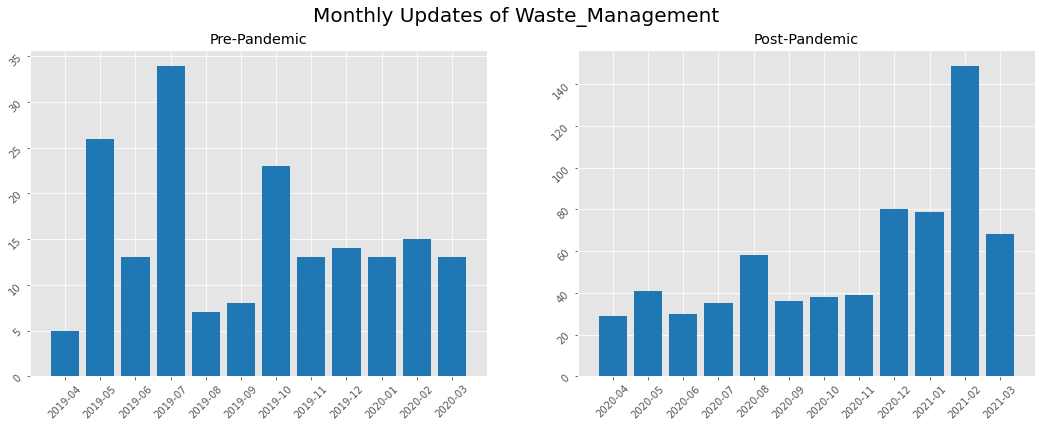

In [18]:
# Monthly trend in all type of businesses adjustments pre/post pandemic
for grp in set(pre_update["amenity_group"]):

    plt.style.use('ggplot')
    #f, ax = plt.subplots(2, 1, figsize=(8.5, 12.5), sharey='col')
    f, ax = plt.subplots(1, 2, figsize=(18, 6), sharey='col')
    ax[0].tick_params(labelrotation=45)


    ax[0].bar(pre_update[pre_update["amenity_group"]==grp].groupby("YM").size().index,pre_update[pre_update["amenity_group"]==grp].groupby("YM").size(),color="tab:blue")
    plt.setp(ax[0], title='Pre-Pandemic')

    ax[1].tick_params(labelrotation=45)


    ax[1].bar(post_update[post_update["amenity_group"]==grp].groupby("YM").size().index,post_update[post_update["amenity_group"]==grp].groupby("YM").size(),color="tab:blue")
    plt.setp(ax[1], title='Post-Pandemic')

    n_rows = 1
    y_title_pos = ax[0].get_position().get_points()[1][1]+(1/n_rows)*0.1
    plt.suptitle("Monthly Updates of "+grp,fontsize=20,y=y_title_pos)

    plt.savefig(grp+"_Updates_London.png",bbox_inches = 'tight')

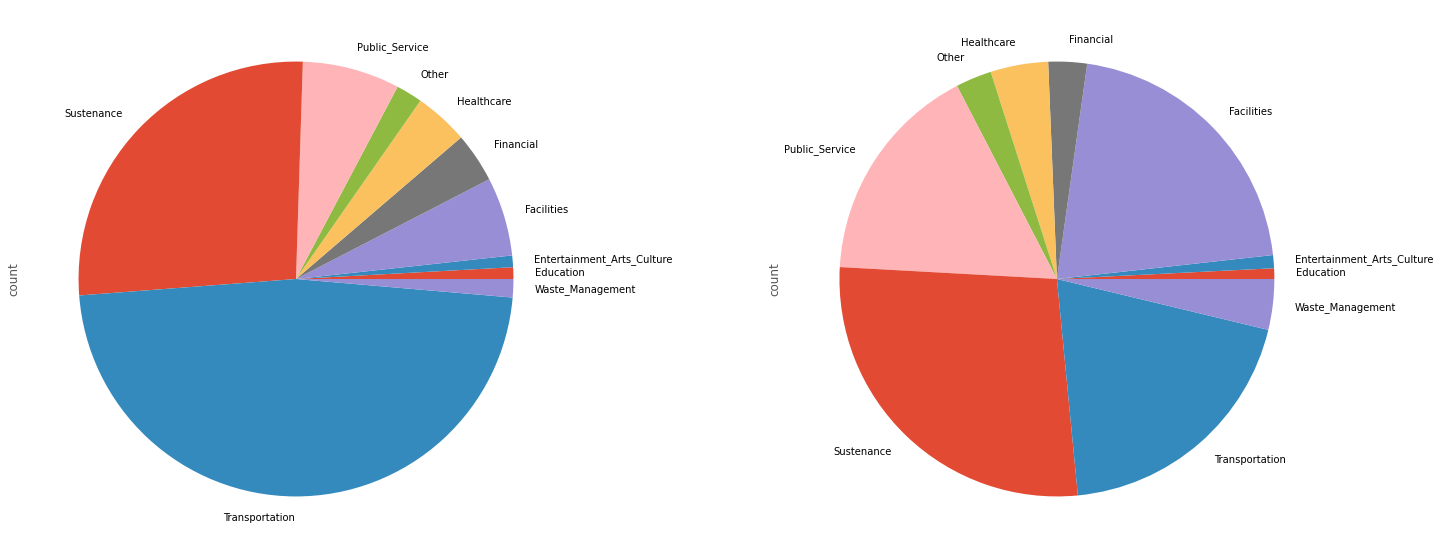

In [ ]:
pre_update["count"] = 1
post_update["count"] = 1
pre_new["count"] = 1
post_new["count"] = 1

# Pie chart showing adjustments of each amenity types
f, ax = plt.subplots(1, 2, figsize=(25, 10))
pre_update.groupby(['amenity_group']).sum().plot(kind='pie', y='count', ax=ax[0],legend=None)
post_update.groupby(['amenity_group']).sum().plot(kind='pie', y='count', ax=ax[1],legend=None)
plt.show()

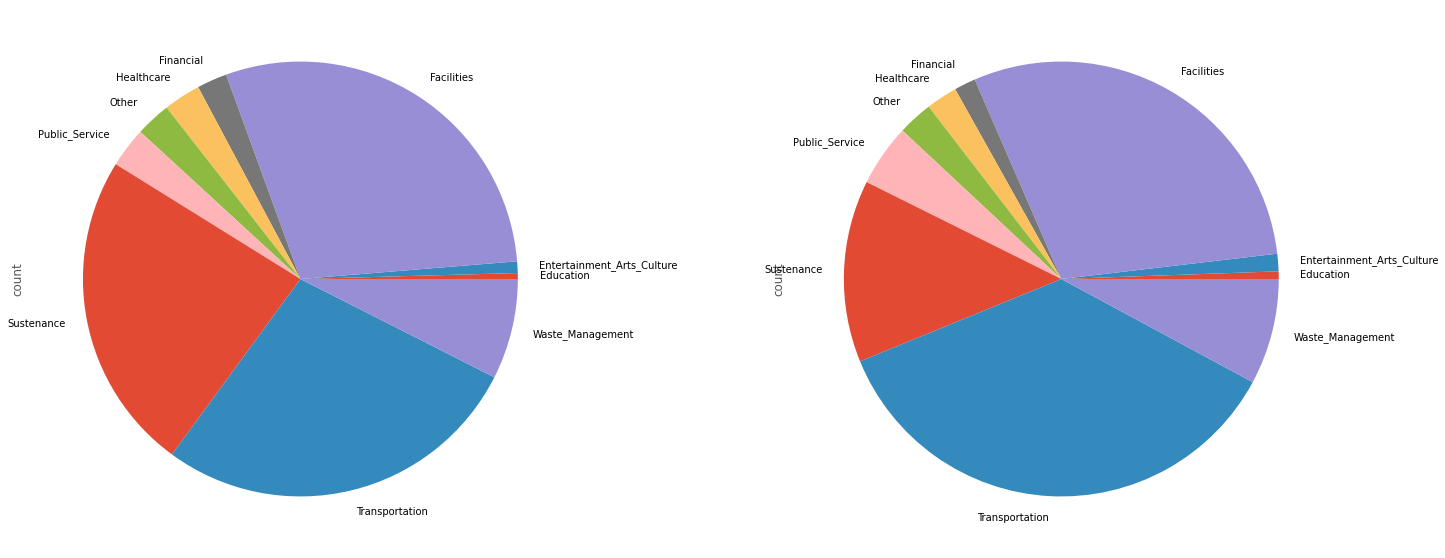

In [ ]:
# Pie chart showing new openings of each amenity types
f, ax = plt.subplots(1, 2, figsize=(25, 10))
pre_new.groupby(['amenity_group']).sum().plot(kind='pie', y='count', ax=ax[0],legend=None)
post_new.groupby(['amenity_group']).sum().plot(kind='pie', y='count', ax=ax[1],legend=None)
plt.show()